In [1]:
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [2]:
df = pd.read_csv('/Users/tusharparekh/Downloads/CodeBase/Hackathon/mu_sigma/Problem_statement1_dataset/adult.csv')

In [3]:
print(df.shape)
print(df.info())
df.head()

(32561, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  country         32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
None


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
df.replace(" ?", np.nan, inplace = True)
df = df.dropna()
print(df.shape)

(30162, 15)


In [5]:
df['salary'] = df['salary'].map( {' <=50K': 0, ' >50K': 1} ).astype(int)

In [6]:
df['sex'] = df['sex'].map( {' Female': 1, ' Male': 0} ).astype(int)

In [7]:
print(df.groupby(['race'])['race'].count())

race
 Amer-Indian-Eskimo      286
 Asian-Pac-Islander      895
 Black                  2817
 Other                   231
 White                 25933
Name: race, dtype: int64


In [8]:
df['race'] = df['race'].map( {' Amer-Indian-Eskimo': 1, ' Asian-Pac-Islander': 2,' Black': 3, ' White': 4, ' Other': 5,  } ).astype(int)

In [9]:
print(df.groupby(['marital-status'])['marital-status'].count())

marital-status
 Divorced                  4214
 Married-AF-spouse           21
 Married-civ-spouse       14065
 Married-spouse-absent      370
 Never-married             9726
 Separated                  939
 Widowed                    827
Name: marital-status, dtype: int64


In [10]:
df['marital-status'] = df['marital-status'].map( {' Divorced': 1, ' Separated': 1,' Widowed': 1, ' Never-married': 2, ' Married-AF-spouse': 3,' Married-civ-spouse': 3 ,' Married-spouse-absent': 3  } ).astype(int)

In [11]:
print(df.groupby(['relationship'])['relationship'].count())

relationship
 Husband           12463
 Not-in-family      7726
 Other-relative      889
 Own-child          4466
 Unmarried          3212
 Wife               1406
Name: relationship, dtype: int64


In [21]:
df['relationship'] = df['relationship'].map( {' Husband': 3, ' Wife': 3,' Unmarried': 2, ' Own-child': 4, ' Not-in-family': 1, ' Other-relative': 5 } ).astype(int)

In [22]:
print(df.groupby(['workclass'])['workclass'].count())

workclass
 Federal-gov           943
 Local-gov            2067
 Private             22286
 Self-emp-inc         1074
 Self-emp-not-inc     2499
 State-gov            1279
 Without-pay            14
Name: workclass, dtype: int64


In [23]:
df['workclass'] = df['workclass'].map( {' Federal-gov': 1, ' Local-gov': 1,' State-gov': 1, ' Private': 2, ' Self-emp-inc': 3, ' Self-emp-not-inc': 3,' Without-pay': 4 } ).astype(int)

array([[<AxesSubplot:title={'center':'age'}>]], dtype=object)

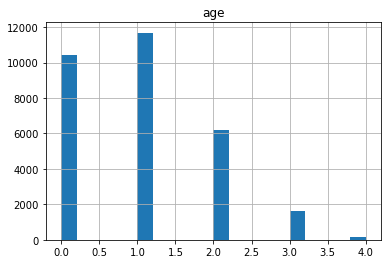

In [24]:
df.hist(column='age',bins = 20)

In [14]:
df['AgeBand'] = pd.cut(df['age'], 5)
df[['AgeBand', 'salary']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,salary
0,"(16.927, 31.6]",0.080207
1,"(31.6, 46.2]",0.325175
2,"(46.2, 60.8]",0.388621
3,"(60.8, 75.4]",0.258400
4,"(75.4, 90.0]",0.171598


In [15]:
df.loc[ df['age'] <= 31.6, 'age'] = 0
df.loc[(df['age'] > 31.6) & (df['age'] <= 46.2), 'age'] = 1
df.loc[(df['age'] > 46.2) & (df['age'] <= 60.8), 'age'] = 2
df.loc[(df['age'] > 60.8) & (df['age'] <= 75.4), 'age'] = 3
df.loc[ df['age'] > 75.4, 'age'] = 4
df = df.drop(['AgeBand'], axis=1)

In [16]:
df["capital"] = df['capital-gain'] - df['capital-loss']

In [17]:
df = df.drop(['capital-gain','capital-loss'], axis=1)

In [18]:
df['CapitalBand'] = pd.cut(df['capital'], 4)
df[['CapitalBand', 'salary']].groupby(['CapitalBand'], as_index=False).mean().sort_values(by='CapitalBand', ascending=True)

,CapitalBand,salary
0,"(-4460.355, 21732.75]",0.244134
1,"(21732.75, 47821.5]",0.882353
2,"(47821.5, 73910.25]",NaN
3,"(73910.25, 99999.0]",1.000000


In [19]:
df.loc[ df['capital'] < 0, 'capital'] = 0
df.loc[ (df['capital'] > -1) & (df['capital'] <= 1), 'capital'] = 1
df.loc[(df['capital'] > 1) & (df['capital'] <= 6080), 'capital'] = 2
df.loc[(df['capital'] > 6080), 'capital'] = 3

df = df.drop(['CapitalBand'], axis=1)

In [26]:
df = df.drop(['education','country','occupation'], axis=1)

In [41]:
df.head(50)
df.shape

(30162, 11)

### MODEL

In [43]:
X = df.iloc[:,:-1].values
y = df['capital'].values

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25)

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
model.score(X_test,y_test)

In [47]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=3)
kf

KFold(n_splits=3, random_state=None, shuffle=False)

In [49]:
def get_score(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    return model.score(X_test, y_test)

In [50]:
from sklearn.model_selection import StratifiedKFold
folds = StratifiedKFold(n_splits=3)

scores_logistic = []
scores_svm = []
scores_rf = []

for train_index, test_index in folds.split(X,y):
    X_train, X_test, y_train, y_test = X[train_index], X[test_index], \
                                       y[train_index], y[test_index]
    scores_logistic.append(get_score(LogisticRegression(solver='liblinear',multi_class='ovr'), X_train, X_test, y_train, y_test))  
    scores_svm.append(get_score(SVC(gamma='auto'), X_train, X_test, y_train, y_test))
    scores_rf.append(get_score(RandomForestClassifier(n_estimators=40), X_train, X_test, y_train, y_test))

In [51]:
scores_logistic

[0.9158543863139049, 0.9158543863139049, 0.9158543863139049]

In [53]:
scores_svm

[0.9154565347125522, 0.9157549234135668, 0.9150586831111995]

In [52]:
scores_rf

[0.9020290431668987, 0.9009349512631788, 0.9015317286652079]

In [ ]:
grid = sns.FacetGrid(df, row='race', size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'sex', 'salary', 'sex', palette='deep')
grid.add_legend()

In [ ]:
from sklearn import svm, datasets

from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(svm.SVC(gamma='auto'), {
    'C': [1,10,20],
    'kernel': ['rbf','linear']
}, cv=5, return_train_score=False)
clf.fit(X, y)
clf.cv_results_

## ARCHIVED

In [ ]:
# print(df.groupby(['occupation'])['occupation'].count())

In [ ]:
# g = sns.FacetGrid(df, col='salary')
# g.map(plt.hist, 'age', bins=20)

In [ ]:
# g = sns.FacetGrid(df, col='salary')
# g.map(plt.hist, 'education-num', bins=20)

In [ ]:
# g = sns.FacetGrid(df, col='education')
# g.map(plt.hist, 'education-num', bins=20)

In [ ]:
# grid = sns.FacetGrid(df, col='salary', row='education', size=2.2, aspect=1.6)
# grid.map(plt.hist, 'education-num', alpha=.5, bins=20)
# grid.add_legend();

In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [ ]:
# X_train.head()

In [ ]:
# missing_data = df.isnull()
# missing_data.head(50)

In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3) 